# PRIMERA PARTE

## Cargando datos

En este caso utilizamos [20 News Groups](http://qwone.com/~jason/20Newsgroups/), una colecciòn de ~20,000 documentos en inglés. Cada documento pertenece a un foro particular de 20 posibles. 

In [1]:
# Cargando librerias de utilidad
import random
import numpy as np
np.random.seed(42)

# Cargando librerias relevante para ejemplo
from sklearn.datasets import fetch_20newsgroups
collection = fetch_20newsgroups(subset='train')
print("== Total documentos: ", len(collection.data))
print("== Primer documento:\n", collection.data[0])
print("== Documento aleatorio:\n", collection.data[random.choice(range(len(collection.data)))])

== Total documentos:  11314
== Primer documento:
 From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----





== Documento aleatorio:
 From: vech@Ra.MsState.Edu (Craig A. Vechorik)
Subject: Re: BMW MOA members read this!
Nntp-Posting-Host: ra.msstate.edu
Organization: Mississippi State University
Lines: 14

In regards ot some of the pos

# Count vectorizer

El método CountVectorizer transforma una lista de documentos en su representación vectorial. Lo primero que hay que hacer es crear el objeto del tipo vectorizer.

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()

Con el objeto vectorizer, ahora podemos determinar el vocabulario (_fit_) y transformar (_transform_) los documentos a sus vectores correspondientes. Verificar que es un vector disperso (muchos zeros).

In [3]:
X=vectorizer.fit_transform(collection.data)
print("Tamaño de vocabulario:", len(vectorizer.vocabulary_))
print("Tamaño de matrix X:", X.shape)

Tamaño de vocabulario: 130107
Tamaño de matrix X: (11314, 130107)


In [4]:
print("Valores del primer documento", X[0])

Valores del primer documento   (0, 56979)	3
  (0, 75358)	2
  (0, 123162)	2
  (0, 118280)	2
  (0, 50527)	2
  (0, 124031)	2
  (0, 85354)	1
  (0, 114688)	1
  (0, 111322)	1
  (0, 123984)	1
  (0, 37780)	5
  (0, 68532)	3
  (0, 114731)	5
  (0, 87620)	1
  (0, 95162)	1
  (0, 64095)	1
  (0, 98949)	1
  (0, 90379)	1
  (0, 118983)	1
  (0, 89362)	3
  (0, 79666)	1
  (0, 40998)	1
  (0, 92081)	1
  (0, 76032)	1
  (0, 4605)	1
  :	:
  (0, 37565)	1
  (0, 113986)	1
  (0, 83256)	1
  (0, 86001)	1
  (0, 51730)	1
  (0, 109271)	1
  (0, 128026)	1
  (0, 96144)	1
  (0, 78784)	1
  (0, 63363)	1
  (0, 90252)	1
  (0, 123989)	1
  (0, 67156)	1
  (0, 128402)	2
  (0, 62221)	1
  (0, 57308)	1
  (0, 76722)	1
  (0, 94362)	1
  (0, 78955)	1
  (0, 114428)	1
  (0, 66098)	1
  (0, 35187)	1
  (0, 35983)	1
  (0, 128420)	1
  (0, 86580)	1


## Cargando datos de nuevo para graficar

In [5]:
collection = fetch_20newsgroups(subset='train', categories=['sci.med', 'talk.religion.misc'])
print("== Total documentos: ", len(collection.data))
X=vectorizer.fit_transform(collection.data)
y=collection.target
print("Tamaño de vocabulario:", len(vectorizer.vocabulary_))
print("Tamaño de matrix X:", X.shape)
print("Tamaño de vector y:", y.shape)

== Total documentos:  971
Tamaño de vocabulario: 22805
Tamaño de matrix X: (971, 22805)
Tamaño de vector y: (971,)


## Graficando los vectores

Para graficar utilizaremos la descomposición vectorial PCA

In [6]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
reduced_X = pca.fit_transform(X.todense())
print("Tamaño de matrix X reducida:", reduced_X.shape)

Tamaño de matrix X reducida: (971, 2)


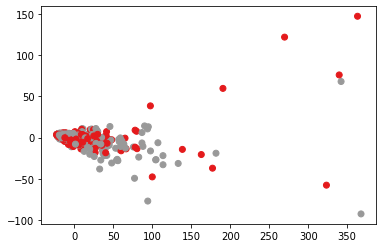

In [7]:
plt.scatter(reduced_X[:,0],reduced_X[:,1],c=y, cmap=plt.cm.Set1)
plt.show()

# SEGUNDA PARTE

Tamaño de matrix X reducida: (971, 2)


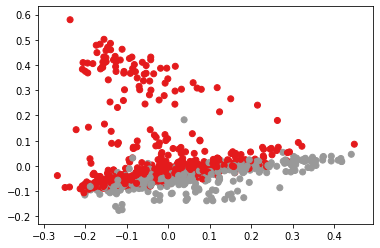

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer2=TfidfVectorizer()
X=vectorizer2.fit_transform(collection.data)
reduced_X = pca.fit_transform(X.todense())
print("Tamaño de matrix X reducida:", reduced_X.shape)
plt.scatter(reduced_X[:,0],reduced_X[:,1],c=y, cmap=plt.cm.Set1)
plt.show()

# TERCERA PALABRA

Quitando las palabras funcionales

Tamaño de matrix X: (971, 22505)
Tamaño de matrix X reducida: (971, 2)


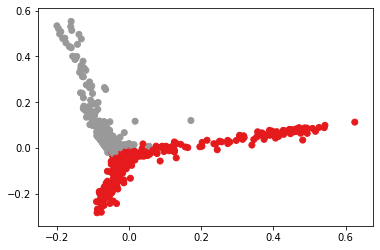

In [9]:
vectorizer2=TfidfVectorizer(stop_words="english")
X=vectorizer2.fit_transform(collection.data)
print("Tamaño de matrix X:", X.shape)
reduced_X = pca.fit_transform(X.todense())
print("Tamaño de matrix X reducida:", reduced_X.shape)
plt.scatter(reduced_X[:,0],reduced_X[:,1],c=y, cmap=plt.cm.Set1)
plt.show()

Quitando las palabras pocos comunes

Tamaño de matrix X: (971, 4815)
Tamaño de matrix X reducida: (971, 2)


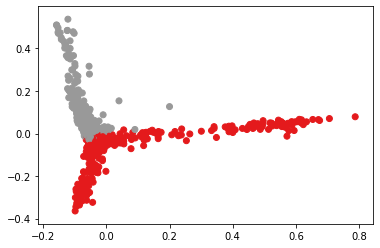

In [10]:
vectorizer2=TfidfVectorizer(stop_words="english", min_df=5)
X=vectorizer2.fit_transform(collection.data)
print("Tamaño de matrix X:", X.shape)
reduced_X = pca.fit_transform(X.todense())
print("Tamaño de matrix X reducida:", reduced_X.shape)
plt.scatter(reduced_X[:,0],reduced_X[:,1],c=y, cmap=plt.cm.Set1)
plt.show()

Usando n-gramas

Tamaño de matrix X: (971, 54178)
Tamaño de matrix X: (971, 2)


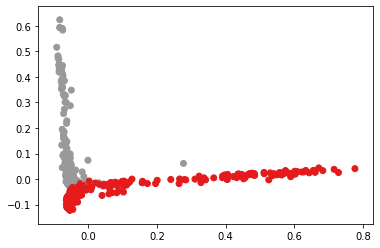

In [11]:
vectorizer2=TfidfVectorizer(stop_words="english", min_df=2, ngram_range=(1,3))
X=vectorizer2.fit_transform(collection.data)
print("Tamaño de matrix X:", X.shape)
reduced_X = pca.fit_transform(X.todense())
print("Tamaño de matrix X:", reduced_X.shape)
plt.scatter(reduced_X[:,0],reduced_X[:,1],c=y, cmap=plt.cm.Set1)
plt.show()

Quitando aquellos términos que rebasen un valor

Tamaño de matrix X: (971, 53814)
Tamaño de matrix X: (971, 2)


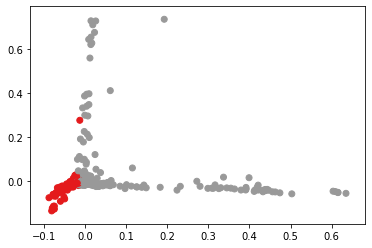

In [12]:
vectorizer2=TfidfVectorizer(stop_words="english", min_df=2, ngram_range=(1,3), max_df=50)
X=vectorizer2.fit_transform(collection.data)
print("Tamaño de matrix X:", X.shape)
reduced_X = pca.fit_transform(X.todense())
print("Tamaño de matrix X:", reduced_X.shape)
plt.scatter(reduced_X[:,0],reduced_X[:,1],c=y, cmap=plt.cm.Set1)
plt.show()